<a href="https://colab.research.google.com/github/TianziLuo/Machine-learning-/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [13]:
from google.colab import drive 
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/machine learning/dataset/Titanic.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Survival - Survival (0 = No; 1 = Yes). 

Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [17]:
data.drop(columns=['PassengerId','Cabin','Ticket','Name'],inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S
5,0,3,male,14.0,0,0,9.2250,S
6,1,3,female,30.0,0,0,7.6292,Q
7,0,2,male,26.0,1,1,29.0000,S
8,1,3,female,18.0,0,0,7.2292,C
9,0,3,male,21.0,2,0,24.1500,S


In [19]:
data.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [22]:
nan_col=['Age','Fare']
for i in nan_col:
  med = data[i].median()
  data[i]=data[i].replace(np.nan,med)

data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0d76aae4c0>,
      dtype=object)

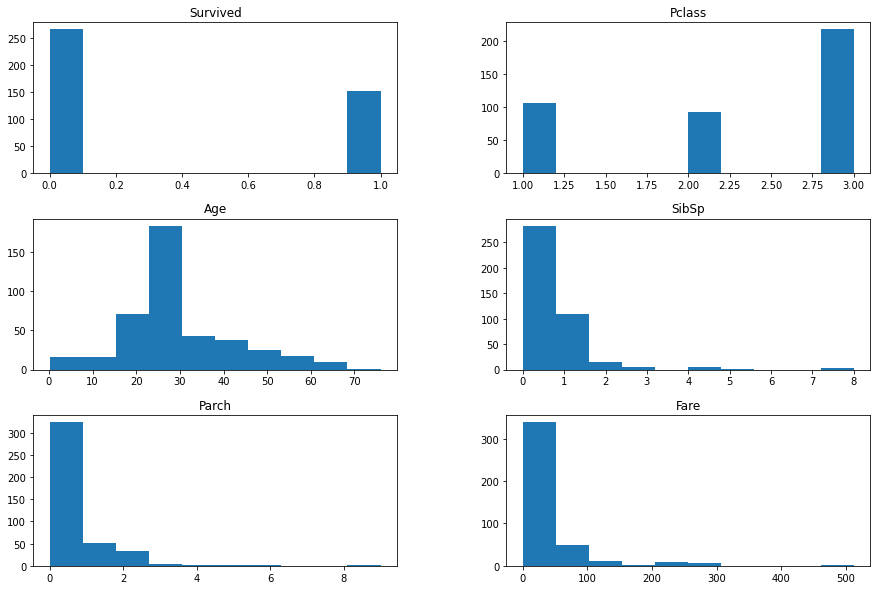

In [25]:
data.hist(figsize=(15,10),grid=False)

In [54]:
# compare bitwisely (and: &. or:|)
## https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
index_name = data[(data['Parch']>=8) | (data['SibSp']>=7) | (data['Fare']>400)].index
#print(index_name)
data.drop(index_name,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [59]:
data['Sex']=data['Sex'].replace({'female':1, 'male':0})
data['Embarked']=data['Embarked'].replace({'Q':1,'S':2,'C':3})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2


In [64]:
data.duplicated().sum()

41

In [66]:
data.drop_duplicates()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,1
1,1,3,1,47.0,1,0,7.0000,2
2,0,2,0,62.0,0,0,9.6875,1
3,0,3,0,27.0,0,0,8.6625,2
4,1,3,1,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
411,1,1,1,37.0,1,0,90.0000,1
412,1,3,1,28.0,0,0,7.7750,2
414,1,1,1,39.0,0,0,108.9000,3
415,0,3,0,38.5,0,0,7.2500,2


In [69]:
X = data.iloc[:,1:]
print(X)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0         3    0  34.5      0      0    7.8292         1
1         3    1  47.0      1      0    7.0000         2
2         2    0  62.0      0      0    9.6875         1
3         3    0  27.0      0      0    8.6625         2
4         3    1  22.0      1      1   12.2875         2
..      ...  ...   ...    ...    ...       ...       ...
413       3    0  27.0      0      0    8.0500         2
414       1    1  39.0      0      0  108.9000         3
415       3    0  38.5      0      0    7.2500         2
416       3    0  27.0      0      0    8.0500         2
417       3    0  27.0      1      1   22.3583         3

[413 rows x 7 columns]


In [71]:
y = data.iloc[:,0:1]
print(y)

     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
413         0
414         1
415         0
416         0
417         0

[413 rows x 1 columns]


In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf1 = RandomForestClassifier()
clf2 = LinearRegression()
ACC = []
my_base_model= [clf1,clf2]

#for i in my_base_model:
  #print(i)
classifier = AdaBoostClassifier(estimator=LinearRegression())
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_pred,y_test)
ACC.append(acc)

TypeError: ignored